### **INDEX**
1. Setup Notebook
2. Answering Business Questions
   - 2.1 How does customer behavior differ per region?
   - 2.2 How do spending habits among customers differ between regions?
   - 2.3 Which data-driven customer profiles can we leverage to maximize the relevance and impact of our marketing strategies?
3. Saving & Exporting 

 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .

### **1. SETUP NOTEBOOK**

In [5]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from pathlib import Path

In [6]:
# get the current working directory as a Path object
path = os.getcwd()

# update the path to parent folder
path = os.path.abspath(os.path.join(path, os.pardir))

In [7]:
# import data containing order, product and customer data
df_ords_prods_cust = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_cust.pkl'))

In [8]:
# setting up color palette for plots
palette = sns.color_palette("Accent")

In [9]:
# import departments.csv
df_departments = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'departments.csv'))

In [10]:
# conducting initial data validation checks
df_ords_prods_cust.shape

(27811929, 31)

In [11]:
df_ords_prods_cust.columns

Index(['user_id', 'm/f', 'state', 'age', 'date_joined', 'n_dependants',
       'maritial_status', 'income', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_last_order', 'first_order',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'busy_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_spending', 'spending_type', 'order_frequency', 'customer_type',
       'region', 'activity_type', 'customer_profile'],
      dtype='object')

In [12]:
df_ords_prods_cust.head()

,user_id,m/f,state,age,date_joined,n_dependants,maritial_status,income,order_number,orders_day_of_week,...,busiest_period_of_day,max_order,loyalty_flag,average_spending,spending_type,order_frequency,customer_type,region,activity_type,customer_profile
0,26711,Female,Missouri,48,2017-01-01,3,married,165665,1,2,...,Fewest orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,NaN,Conscious Shopper
1,26711,Female,Missouri,48,2017-01-01,3,married,165665,2,2,...,Fewest orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,NaN,Conscious Shopper
2,26711,Female,Missouri,48,2017-01-01,3,married,165665,3,3,...,Fewest orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,NaN,Conscious Shopper
3,26711,Female,Missouri,48,2017-01-01,3,married,165665,3,3,...,Fewest orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,NaN,Conscious Shopper
4,26711,Female,Missouri,48,2017-01-01,3,married,165665,3,3,...,Fewest orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,NaN,Conscious Shopper


 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .

### **2. BUSINESS QUESTIONS**

**2.1 HOW DOES CUSTOMER BEHAVIOR DIFFER PER REGION?**

In [16]:
# create region as a new variable and assign states to 
shell = []

for value in df_ords_prods_cust['state']:
  if value in ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']:
   shell.append("Northeast")
  elif value in ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']:
    shell.append("Midwest")
  elif value in ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']:
    shell.append("South")
  elif value in ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']:
    shell.append("West")
  else:
    shell.append("Unknown")

In [17]:
# embed region as new variable in dataframe
df_ords_prods_cust['region'] = shell

In [18]:
# confirm all defined regions being assigned to new variable 
df_ords_prods_cust['region'].value_counts(dropna=False)

region
South        9260103
West         7103408
Midwest      6545274
Northeast    4903144
Name: count, dtype: int64

In [19]:
# creating baseline insight in total number of unique users per spending_type
df_ords_prods_cust.groupby('spending_type')['user_id'].nunique()

spending_type
High spender      3146
Low spender     188755
Name: user_id, dtype: int64

 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .

In [21]:
# creating separate bar plots for low and high spending unique customers to enhance readability due to wide varying scale

# defining table for low spending unique customers per region
low_spender_by_region = df_ords_prods_cust[df_ords_prods_cust['spending_type'] == 'Low spender'].groupby('region')['user_id'].nunique()

In [22]:
# reading values for number of low spending unique customers per region
low_spender_by_region

region
Midwest      44485
Northeast    33287
South        62892
West         48091
Name: user_id, dtype: int64

Text(0, 0.5, 'Number of Low Spending Customers')

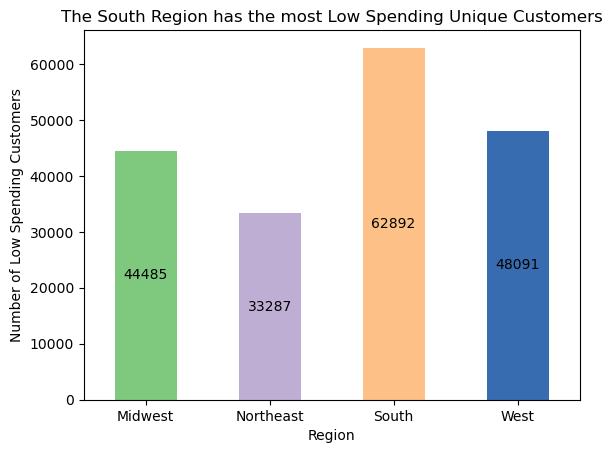

In [23]:
# define design attributes
Midwest = palette[0]
Northeast = palette[1]
South = palette[2]
West = palette[4]

# creating bar chart to illustrate the scale of spending types by region
bar1 = low_spender_by_region.plot(kind='bar', color=[Midwest, Northeast, South, West])

# lay out plot
for c in bar1.containers: bar1.bar_label(c, label_type='center')
plt.title('The South Region has the most Low Spending Unique Customers')
plt.xlabel('Region'), plt.xticks(rotation=0, ha='center')
plt.ylabel('Number of Low Spending Customers')

In [24]:
# defining table for high spending unique customers per region
high_spender_by_region = df_ords_prods_cust[df_ords_prods_cust['spending_type'] == 'High spender'].groupby('region')['user_id'].nunique()

In [25]:
# reading values for number of high spending unique customers per region
high_spender_by_region

region
Midwest       748
Northeast     500
South        1060
West          838
Name: user_id, dtype: int64

Text(0, 0.5, 'Number of High Spending Customers')

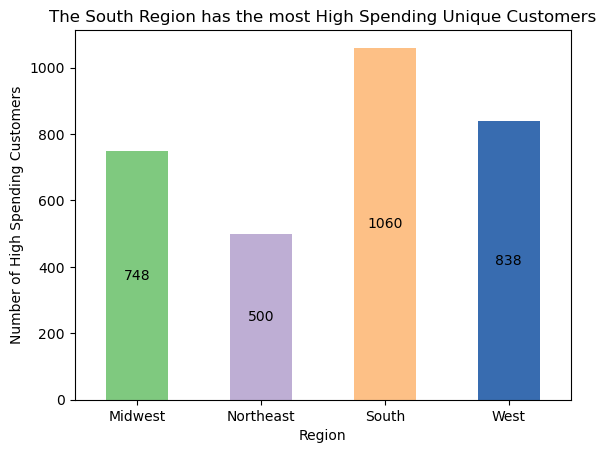

In [26]:
# define design attributes
Midwest = palette[0]
Northeast = palette[1]
South = palette[2]
West = palette[4]

# creating bar chart to illustrate the scale of spending types by region
bar2 = high_spender_by_region.plot(kind='bar', color=[Midwest, Northeast, South, West])

# lay out plot
for c in bar2.containers: bar2.bar_label(c, label_type='center')
plt.title('The South Region has the most High Spending Unique Customers')
plt.xlabel('Region'), plt.xticks(rotation=0, ha='center')
plt.ylabel('Number of High Spending Customers')

 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .

**2.2 HOW DO SPENDING HABITS AMONG CUSTOMER DIFFER BETWEEN REGIONS?**

In [29]:
# creating exclusion flag for low-active customers with less than 5 orders
df_ords_prods_cust.loc[df_ords_prods_cust['order_frequency'] < 5, 'activity_type'] = 'Low activity'

In [30]:
# confim added column
df_ords_prods_cust.columns

Index(['user_id', 'm/f', 'state', 'age', 'date_joined', 'n_dependants',
       'maritial_status', 'income', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_last_order', 'first_order',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'busy_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_spending', 'spending_type', 'order_frequency', 'customer_type',
       'region', 'activity_type', 'customer_profile'],
      dtype='object')

In [31]:
# counting flag
df_ords_prods_cust['activity_type'].value_counts()

Series([], Name: count, dtype: int64)

In [32]:
# creating low active customers as a subset
df_ords_prods_cust_low = df_ords_prods_cust[df_ords_prods_cust['activity_type'] == 'Low activity']

In [33]:
# confirm sample 
df_ords_prods_cust_low

,user_id,m/f,state,age,date_joined,n_dependants,maritial_status,income,order_number,orders_day_of_week,...,busiest_period_of_day,max_order,loyalty_flag,average_spending,spending_type,order_frequency,customer_type,region,activity_type,customer_profile


In [34]:
# export sample as pickle
df_ords_prods_cust_low.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'df_ords_prods_cust_low.pkl'))

In [35]:
# excluding low active customers 
df_ords_prods_cust = df_ords_prods_cust[df_ords_prods_cust['activity_type']!='Low activity']

In [36]:
# confirming new number of rows being 32404859 - 4592930 = 27811929
df_ords_prods_cust.shape

(27811929, 31)

 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .

**2.3 WHICH DATA-DRIVEN CUSTOMER PROFILES CAN WE LEVERATE TO MAXIMIZE RELEVANCE AND IMPACT OF OUR MARKETING STRATEGIES?**

In [39]:
# creating dataframe to generate range of values to design customer profiles upon
customer_profile = df_ords_prods_cust.groupby('department_id').agg({
    'orders_day_of_week': ['min', 'max', lambda x: x.mode()[0]],
    'order_hour_of_day': ['min', 'max', lambda x: x.mode()[0]],
    'age': ['min', 'max', lambda x: x.mode()[0]],
    'n_dependants': ['min', 'max', lambda x: x.mode()[0]],
    })

In [40]:
# reading values
customer_profile

orders_day_of_week                order_hour_of_day      \
                             min max <lambda_0>               min max   
department_id                                                           
1                              0   6          0                 0  23   
2                              0   6          0                 0  23   
3                              0   6          0                 0  23   
4                              0   6          0                 0  23   
5                              0   6          5                 0  23   
6                              0   6          0                 0  23   
7                              0   6          1                 0  23   
8                              0   6          0                 0  23   
9                              0   6          0                 0  23   
10                             0   6          1                 0  23   
11                             0   6          0                 0  23   
12                             0   6          0                 0  23   
13                             0   6          0                 0  23   
14                             0   6          0                 0  23   
15                             0   6          0                 0  23   
16                             0   6          0                 0  23   
17                             0   6          0                 0  23   
18                             0   6          0                 0  23   
19                             0   6          1                 0  23   
20                             0   6          0                 0  23   
21                             0   6          0                 0  23   

                         age                n_dependants                 
              <lambda_0> min max <lambda_0>          min max <lambda_0>  
department_id                                                            
1                     15  18  81         35            0   3          3  
2                     15  18  81         20            0   3          1  
3                     15  18  81         31            0   3          0  
4                     11  18  81         43            0   3          3  
5                     15  18  81         45            0   3          1  
6                     15  18  81         40            0   3          1  
7                     10  18  81         55            0   3          2  
8                     16  18  81         24            0   3          1  
9                     15  18  81         54            0   3          3  
10                    10  18  81         47            0   3          1  
11                    10  18  81         47            0   3          1  
12                    15  18  81         79            0   3          3  
13                    11  18  81         49            0   3          2  
14                    10  18  81         35            0   3          1  
15                    11  18  81         49            0   3          3  
16                    10  18  81         31            0   3          1  
17                    11  18  81         72            0   3          1  
18                    10  18  81         43            0   3          2  
19                    10  18  81         55            0   3          2  
20                    11  18  81         35            0   3          3  
21                    10  18  81         20            0   3          2

In [41]:
# copying dataframe to excel to design customer profiles on 
customer_profile.to_clipboard()

> **Based on the data above, I propose and created the following 3 customer profiles:**
> 1. Family Shopper - organizes shopping around family needs, with weekend afternoon shopping habits
> 2. Conscious Shopper - organizes shopping around health, withearly-week, morning shopping to prioritize fresh and ethical products
> 3. Urban Shopper - organizes shopping around work and life, rather shops later in the week, prefers for convenience and premium products

In [43]:
# creating customer profile flag: family shopper

# assigning criteria to seperate definitions
fam_day = df_ords_prods_cust['orders_day_of_week'].isin([0, 1])
fam_hour = df_ords_prods_cust['order_hour_of_day'].between(12, 17)
fam_age = df_ords_prods_cust['age'].between(25, 40)
fam_size = df_ords_prods_cust['n_dependants'].isin([1, 2])
fam_dept = df_ords_prods_cust['department_id'].isin([1, 3, 16, 18, 19])

In [44]:
# merging definitions
family_shopper = fam_day & fam_hour & fam_age & fam_size & fam_dept

In [45]:
# add definition as new column
df_ords_prods_cust.loc[family_shopper, 'customer_profile'] = 'Family Shopper'

In [46]:
# creating customer profile flag: conscious shopper

# assigning criteria to seperate definitions
cons_day = df_ords_prods_cust['orders_day_of_week'].isin([2, 3, 4])
cons_hour = df_ords_prods_cust['order_hour_of_day'].between(8, 12)
cons_age = df_ords_prods_cust['age'].between(40, 60)
cons_size = df_ords_prods_cust['n_dependants'].isin([2, 3])
cons_dept = df_ords_prods_cust['department_id'].isin([4, 6, 11, 12, 16])

In [47]:
# merging definitions
counscious_shopper = cons_day & cons_hour & cons_age & cons_size & cons_dept

In [48]:
# add definition as new column
df_ords_prods_cust.loc[counscious_shopper, 'customer_profile'] = 'Conscious Shopper'

In [49]:
# creating customer profile flag: urban shopper

# assigning criteria to seperate definitions
urb_day = df_ords_prods_cust['orders_day_of_week'].isin([5,6])
urb_hour = df_ords_prods_cust['order_hour_of_day'].between(17, 22)
urb_age = df_ords_prods_cust['age'].between(18, 40)
urb_size = df_ords_prods_cust['n_dependants'].isin([0, 1])
urb_dept = df_ords_prods_cust['department_id'].isin([5,7,14,19,20])

In [50]:
# merging definitions
urban_shopper = urb_day & urb_hour & urb_age & urb_size & urb_dept

In [51]:
# add definition as new column
df_ords_prods_cust.loc[urban_shopper, 'customer_profile'] = 'Urban Shopper'

In [52]:
# confirming new column customer_profile is added to the dataframe
df_ords_prods_cust.columns

Index(['user_id', 'm/f', 'state', 'age', 'date_joined', 'n_dependants',
       'maritial_status', 'income', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_last_order', 'first_order',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'busy_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_spending', 'spending_type', 'order_frequency', 'customer_type',
       'region', 'activity_type', 'customer_profile'],
      dtype='object')

In [53]:
# counting total unique customer profiles
df_ords_prods_cust['user_id'].nunique()

191901

In [54]:
# counting unique customer profiles per profile
df_ords_prods_cust.groupby('customer_profile')['user_id'].nunique()

customer_profile
Conscious Shopper    17696
Family Shopper       16351
Urban Shopper        11966
Name: user_id, dtype: int64

 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .

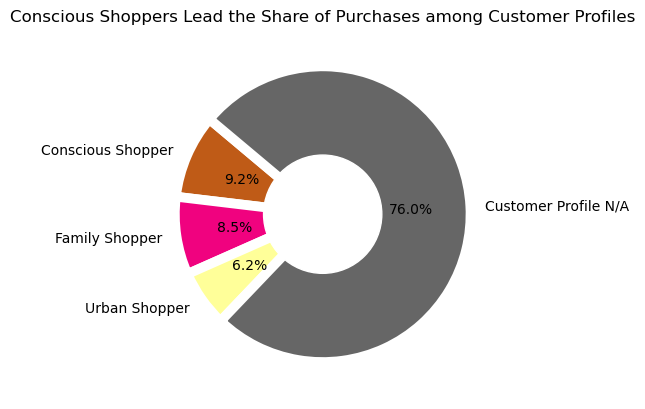

In [56]:
#visualizing the number of customer profiles as part of a whole

# plot data
labels = ['Conscious Shopper', 'Family Shopper', 'Urban Shopper', 'Customer Profile N/A']
sizes = [17696, 16351, 11966, 145888]
cs = palette[6]
fs = palette[5]
us = palette[3]
na = palette[7]

# create donut
plt.pie(sizes, labels=labels, colors=[cs, fs, us, na], autopct='%1.1f%%', startangle=140, wedgeprops={'linewidth' : 7, 'edgecolor' : 'white'})

# lay out
plt.title('Conscious Shoppers Lead the Share of Purchases among Customer Profiles')
my_circle = plt.Circle( (0,0), 0.4, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)

# save plot
donut = os.path.join(path, '04 Analysis', 'Visualizations', 'customerprofile_share.png')
plt.savefig(donut, bbox_inches='tight')

 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .  . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .

In [58]:
# aggregating user frequency and expenditure per customer profile
df_ords_prods_cust.groupby('customer_profile').agg({'order_frequency': ['min', 'max', 'mean'], 'average_spending': ['min', 'max', 'mean']})

order_frequency                  average_spending  \
                              min   max       mean              min   
customer_profile                                                      
Conscious Shopper             5.0  30.0  11.192106             1.30   
Family Shopper                5.0  30.0  11.938507             1.90   
Urban Shopper                 5.0  30.0  11.765318             2.38   

                                        
                         max      mean  
customer_profile                        
Conscious Shopper  20.114286  7.801149  
Family Shopper     13.798667  7.763282  
Urban Shopper      13.800000  7.710779

In [59]:
# comparing the number customer profiles per region
customer_profile_region = df_ords_prods_cust.groupby(['customer_profile', 'region'])['user_id'].nunique().unstack(fill_value=0)

In [60]:
# reading values
customer_profile_region

region,Midwest,Northeast,South,West
customer_profile,,,,
Conscious Shopper,4192,3142,5856,4506
Family Shopper,3770,2864,5500,4217
Urban Shopper,2845,2104,3986,3031


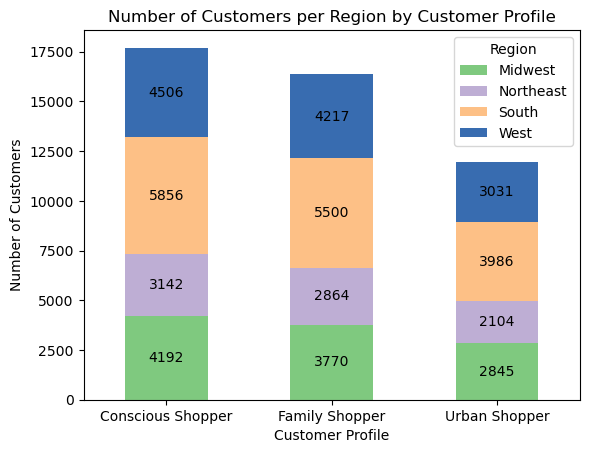

In [61]:
#visualizing the number of customer profiles per region in a stacked bar chart
st_bar = customer_profile_region.plot(kind='bar', stacked=True, color=[Midwest, Northeast, South, West])

# lay out plot
for c in st_bar.containers: st_bar.bar_label(c, label_type='center')
plt.title('Number of Customers per Region by Customer Profile')
plt.xlabel('Customer Profile'), plt.xticks(rotation=0, ha='center')
plt.ylabel('Number of Customers')
plt.legend(title='Region')

Midwest = palette[0]
Northeast = palette[1]
South = palette[2]
West = palette[4]

 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .

In [63]:
# comparing the number customer profiles per department
customer_profile_region_department = df_ords_prods_cust.groupby(['customer_profile', 'region', 'department_id'])['user_id'].nunique().unstack(fill_value=0)

In [64]:
customer_profile_region_department

department_id                  4    6     11    12    16    1     3    18  \
customer_profile  region                                                    
Conscious Shopper Midwest    3658  656   962  1309  3482     0     0    0   
                  Northeast  2743  494   719   938  2641     0     0    0   
                  South      5161  880  1305  1868  4906     0     0    0   
                  West       3959  671  1010  1481  3737     0     0    0   
Family Shopper    Midwest       0    0     0     0  3251  2348  1841  347   
                  Northeast     0    0     0     0  2509  1783  1397  277   
                  South         0    0     0     0  4754  3500  2720  525   
                  West          0    0     0     0  3686  2658  2093  372   
Urban Shopper     Midwest       0    0     0     0     0     0     0    0   
                  Northeast     0    0     0     0     0     0     0    0   
                  South         0    0     0     0     0     0     0    0   
                  West          0    0     0     0     0     0     0    0   

department_id                  19   5     7     14    20  
customer_profile  region                                  
Conscious Shopper Midwest       0    0     0     0     0  
                  Northeast     0    0     0     0     0  
                  South         0    0     0     0     0  
                  West          0    0     0     0     0  
Family Shopper    Midwest    2550    0     0     0     0  
                  Northeast  1891    0     0     0     0  
                  South      3740    0     0     0     0  
                  West       2837    0     0     0     0  
Urban Shopper     Midwest    1878  126  1938   799  1188  
                  Northeast  1383  101  1429   597   868  
                  South      2650  187  2700  1155  1621  
                  West       1985  154  2069   886  1266

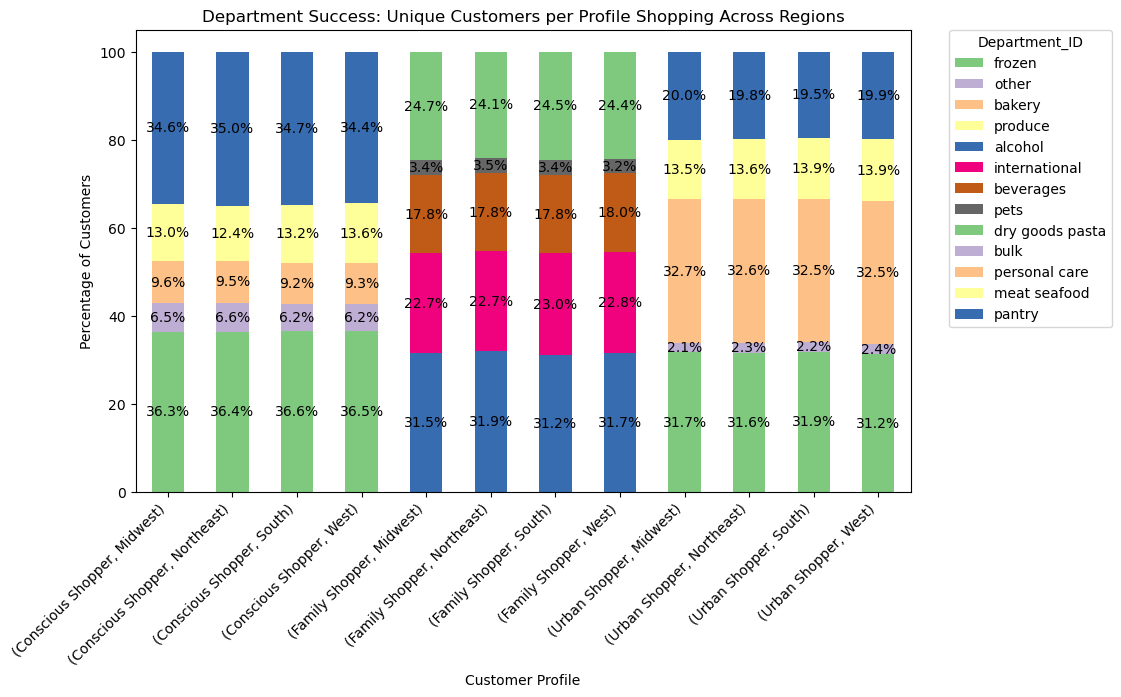

In [65]:
# normalize absolute unique customers into ratio %
customer_profile_region_department_percentage = customer_profile_region_department.div(customer_profile_region_department.sum(axis=1), axis=0) * 100

# #visualizing the number of customer profiles per region in a stacked bar chart with percentages
st_bar2 = customer_profile_region_department_percentage.plot(kind='bar', stacked=True, color=palette, figsize=(10, 6))

# Lay out plot
num_departments = customer_profile_region_department.shape[1]
palette = sns.color_palette("tab20", num_departments)

for c in st_bar2.containers:
    labels = [f'{v.get_height():.1f}%' if v.get_height() > 0 else '' for v in c]
    st_bar2.bar_label(c, labels=labels, label_type='center')

# axes
plt.title('Department Success: Unique Customers per Profile Shopping Across Regions')
plt.xlabel('Customer Profile')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Percentage of Customers')

# legend
department_names = df_departments.iloc[0].to_dict()
plt.legend([department_names.get(str(col), col) for col in df_departments.columns[1:]], title='Department_ID', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

In [66]:
# creating data dictionary to legend the deparment ids
data_dictionary = df_departments.to_dict('index')

In [67]:
# reading data dictionary output
data_dictionary

{0: {'department_id': 'department',
  '1': 'frozen',
  '2': 'other',
  '3': 'bakery',
  '4': 'produce',
  '5': 'alcohol',
  '6': 'international',
  '7': 'beverages',
  '8': 'pets',
  '9': 'dry goods pasta',
  '10': 'bulk',
  '11': 'personal care',
  '12': 'meat seafood',
  '13': 'pantry',
  '14': 'breakfast',
  '15': 'canned goods',
  '16': 'dairy eggs',
  '17': 'household',
  '18': 'babies',
  '19': 'snacks',
  '20': 'deli',
  '21': 'missing'}}

 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .

In [69]:
crosstab = pd.crosstab(df_ords_prods_cust['days_since_last_order'], df_ords_prods_cust['order_number'], dropna = False)

In [70]:
crosstab.to_clipboard()

### **3. SAVING & EXPORTING**

In [72]:
# save to export plots
bar1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'lowspending_region.png'))

In [73]:
bar2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'highspending_region.png'))

In [74]:
st_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'customerprofiles_region.png'))

In [75]:
st_bar2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'deptsuccess_customerprofiles_region.png'))